In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
real = np.load('node_values.npy')

In [58]:
real_speed = real[:,0,0]
real_speed = real_speed[int(6048*6/7):]
real_flow = real[:,0,1]
real_flow = real_flow[int(6048*6/7):]

In [59]:
speed_single_predict5 = np.array(pd.read_csv('single_speed/prediction5.csv',header=None).iloc[:,0])
speed_single_predict10 = np.array(pd.read_csv('single_speed/prediction10.csv',header=None).iloc[:,0])
speed_single_predict15 = np.array(pd.read_csv('single_speed/prediction15.csv',header=None).iloc[:,0])

flow_single_predict5 = np.array(pd.read_csv('single_flow/prediction5.csv',header=None).iloc[:,0])
flow_single_predict10 = np.array(pd.read_csv('single_flow/prediction10.csv',header=None).iloc[:,0])
flow_single_predict15 = np.array(pd.read_csv('single_flow/prediction15.csv',header=None).iloc[:,0])

speed_renormalization_predict5 = np.array(pd.read_csv('renormalization_speed/prediction5.csv',header=None).iloc[:,0])
speed_renormalization_predict10 = np.array(pd.read_csv('renormalization_speed/prediction10.csv',header=None).iloc[:,0])
speed_renormalization_predict15 = np.array(pd.read_csv('renormalization_speed/prediction15.csv',header=None).iloc[:,0])

flow_renormalization_predict5 = np.array(pd.read_csv('renormalization_flow/prediction5.csv',header=None).iloc[:,0])
flow_renormalization_predict10 = np.array(pd.read_csv('renormalization_flow/prediction10.csv',header=None).iloc[:,0])
flow_renormalization_predict15 = np.array(pd.read_csv('renormalization_flow/prediction15.csv',header=None).iloc[:,0])

grey_speed5 = np.array(pd.read_csv('grey_model/speed5.csv',header=None).iloc[:,0])
grey_speed10 = np.array(pd.read_csv('grey_model/speed10.csv',header=None).iloc[:,0])
grey_speed15 = np.array(pd.read_csv('grey_model/speed15.csv',header=None).iloc[:,0])

grey_flow5 = np.array(pd.read_csv('grey_model/flow5.csv',header=None).iloc[:,0])
grey_flow10 = np.array(pd.read_csv('grey_model/flow10.csv',header=None).iloc[:,0])
grey_flow15 = np.array(pd.read_csv('grey_model/flow15.csv',header=None).iloc[:,0])

arima = pd.read_csv('arima/Prediction.csv')
arima = np.array(arima['Prediction'])[:, np.newaxis]
arima = np.concatenate((arima,arima,arima,arima,arima,arima,arima,arima,arima,arima,arima,arima), axis=1).reshape(-1)

arima_flow = pd.read_csv('arima/Prediction_flow.csv')
arima_flow = np.array(arima_flow['Prediction'])[:, np.newaxis]
arima_flow = np.concatenate((arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow,arima_flow), axis=1).reshape(-1)


In [60]:
plt.rcParams['figure.figsize'] = (15.0, 2.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 72

In [61]:
def MAE(predictions,targets):
    return sum(abs(predictions-targets))/len(targets)
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

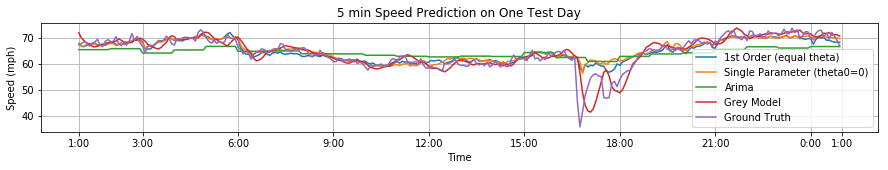

In [62]:
fig1, ax1 = plt.subplots(1,1)
ax1.plot(speed_single_predict5[:288],label='1st Order (equal theta)')
ax1.plot(speed_renormalization_predict5[:288],label='Single Parameter (theta0=0)')
ax1.plot(arima[12:-2][:288],label='Arima')
ax1.plot(grey_speed5[12:-2][:288],label='Grey Model')
ax1.plot(real_speed[12:-2][:288],label='Ground Truth')
ax1.legend()
ax1.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax1.set_xticklabels(['1:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','0:00','1:00'])
ax1.set_title('5 min Speed Prediction on One Test Day')
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed (mph)')
ax1.grid()

In [63]:
print('MAE Single Parameter: ',MAE(speed_single_predict5[:288],real_speed[12:-2][:288]))
print('MAE Zero Theta Zero: ',MAE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
print('MAE Arima: ',MAE(arima[12:-2][:288],real_speed[12:-2][:288]))
print('MAE Grey Model: ',MAE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))

print('RMSE Single Parameter: ',RMSE(speed_single_predict5[:288],real_speed[12:-2][:288]))
print('RMSE Zero Theta Zero: ',RMSE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
print('RMSE Arima: ',RMSE(arima[12:-2][:288],real_speed[12:-2][:288]))
print('RMSE Grey Model: ',RMSE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))

print('MAPE Single Parameter: ',MAPE(speed_single_predict5[:288],real_speed[12:-2][:288]))
print('MAPE Zero Theta Zero: ',MAPE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
print('MAPE Arima: ',MAPE(arima[12:-2][:288],real_speed[12:-2][:288]))
print('MAPE Grey Model: ',MAPE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))

MAE Single Parameter:  1.7700785266028514
MAE Zero Theta Zero:  1.8216383854548137
MAE Arima:  3.51842289266932
MAE Grey Model:  1.7802610226610993
RMSE Single Parameter:  3.001249610981803
RMSE Zero Theta Zero:  3.271848935061585
RMSE Arima:  4.632224361471926
RMSE Grey Model:  2.964822757690556
MAPE Single Parameter:  0.028035242587918032
MAPE Zero Theta Zero:  0.028667046069338023
MAPE Arima:  0.054838223298825865
MAPE Grey Model:  0.02955894180457054


In [64]:
MAE(speed_single_predict5[:288],real_speed[12:-2][:288])

1.7700785266028514

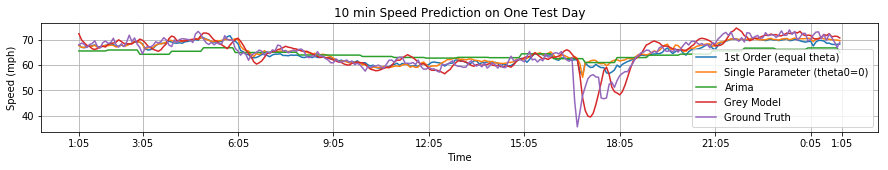

In [65]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(speed_single_predict10[:288],label='1st Order (equal theta)')
ax2.plot(speed_renormalization_predict10[:288],label='Single Parameter (theta0=0)')
ax2.plot(arima[13:-1][:288],label='Arima')
ax2.plot(grey_speed10[13:-1][:288],label='Grey Model')
ax2.plot(real_speed[13:-1][:288],label='Ground Truth')
ax2.legend()
ax2.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax2.set_xticklabels(['1:05','3:05','6:05','9:05','12:05','15:05','18:05','21:05','0:05','1:05'])
ax2.set_title('10 min Speed Prediction on One Test Day')
ax2.set_xlabel('Time')
ax2.set_ylabel('Speed (mph)')
ax2.grid()

In [66]:
print('MAE Single Parameter: ',MAE(speed_single_predict10[:288],real_speed[13:-1][:288]))
print('MAE Zero Theta Zero: ',MAE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
print('MAE Arima: ',MAE(arima[13:-1][:288],real_speed[13:-1][:288]))
print('MAE Grey Model: ',MAE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))

print('RMSE Single Parameter: ',RMSE(speed_single_predict10[:288],real_speed[13:-1][:288]))
print('RMSE Zero Theta Zero: ',RMSE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
print('RMSE Arima: ',RMSE(arima[13:-1][:288],real_speed[13:-1][:288]))
print('RMSE Grey Model: ',RMSE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))

print('MAPE Single Parameter: ',MAPE(speed_single_predict10[:288],real_speed[13:-1][:288]))
print('MAPE Zero Theta Zero: ',MAPE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
print('MAPE Arima: ',MAPE(arima[13:-1][:288],real_speed[13:-1][:288]))
print('MAPE Grey Model: ',MAPE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))

MAE Single Parameter:  1.9380928410424128
MAE Zero Theta Zero:  1.954044712914361
MAE Arima:  3.52638838462269
MAE Grey Model:  2.1589914067442155
RMSE Single Parameter:  3.1671231406960416
RMSE Zero Theta Zero:  3.4467561252213463
RMSE Arima:  4.637352306092266
RMSE Grey Model:  3.6153696827334034
MAPE Single Parameter:  0.03058449092261257
MAPE Zero Theta Zero:  0.030591623120129766
MAPE Arima:  0.05496205711771182
MAPE Grey Model:  0.03600101590843019


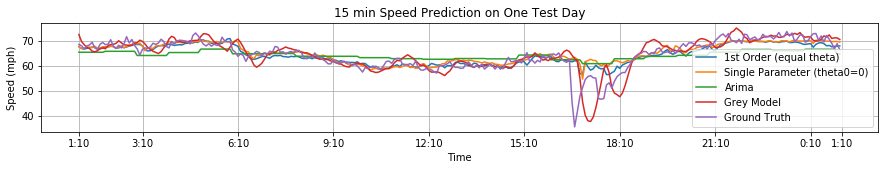

In [67]:
fig3, ax3 = plt.subplots(1,1)
ax3.plot(speed_single_predict15[:288],label='1st Order (equal theta)')
ax3.plot(speed_renormalization_predict15[:288],label='Single Parameter (theta0=0)')
ax3.plot(arima[14:][:288],label='Arima')
ax3.plot(grey_speed15[14:][:288],label='Grey Model')
ax3.plot(real_speed[14:][:288],label='Ground Truth')
ax3.legend()
ax3.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax3.set_xticklabels(['1:10','3:10','6:10','9:10','12:10','15:10','18:10','21:10','0:10','1:10'])
ax3.set_title('15 min Speed Prediction on One Test Day')
ax3.set_xlabel('Time')
ax3.set_ylabel('Speed (mph)')
ax3.grid()

In [68]:
print('MAE Single Parameter: ',MAE(speed_single_predict15[:288],real_speed[14:][:288]))
print('MAE Zero Theta Zero: ',MAE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
print('MAE Arima: ',MAE(arima[14:][:288],real_speed[14:][:288]))
print('MAE Grey Model: ',MAE(grey_speed15[14:][:288],real_speed[14:][:288]))

print('RMSE Single Parameter: ',RMSE(speed_single_predict15[:288],real_speed[14:][:288]))
print('RMSE Zero Theta Zero: ',RMSE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
print('RMSE Arima: ',RMSE(arima[14:][:288],real_speed[14:][:288]))
print('RMSE Grey Model: ',RMSE(grey_speed15[14:][:288],real_speed[14:][:288]))

print('MAPE Single Parameter: ',MAPE(speed_single_predict15[:288],real_speed[14:][:288]))
print('MAPE Zero Theta Zero: ',MAPE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
print('MAPE Arima: ',MAPE(arima[14:][:288],real_speed[14:][:288]))
print('MAPE Grey Model: ',MAPE(grey_speed15[14:][:288],real_speed[14:][:288]))

MAE Single Parameter:  2.0357766018973456
MAE Zero Theta Zero:  2.0678380197948876
MAE Arima:  3.5239372099093935
MAE Grey Model:  2.523083963580491
RMSE Single Parameter:  3.3229336333317696
RMSE Zero Theta Zero:  3.6036372239523384
RMSE Arima:  4.636303639311942
RMSE Grey Model:  4.106952550118962
MAPE Single Parameter:  0.03200797934677779
MAPE Zero Theta Zero:  0.03220338857598094
MAPE Arima:  0.054925594788848384
MAPE Grey Model:  0.04220242759987691


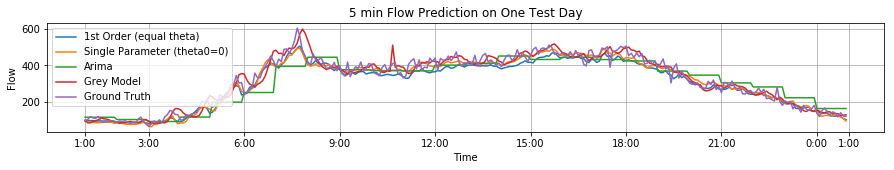

In [69]:
fig4, ax4 = plt.subplots(1,1)
ax4.plot(flow_single_predict5[:288],label='1st Order (equal theta)')
ax4.plot(flow_renormalization_predict5[:288],label='Single Parameter (theta0=0)')
ax4.plot(arima_flow[12:-2][:288],label='Arima')
ax4.plot(grey_flow5[12:-2][:288],label='Grey Model')
ax4.plot(real_flow[12:-2][:288],label='Ground Truth')
ax4.legend()
ax4.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax4.set_xticklabels(['1:00','3:00','6:00','9:00','12:00','15:00','18:00','21:00','0:00','1:00'])
ax4.set_title('5 min Flow Prediction on One Test Day')
ax4.set_xlabel('Time')
ax4.set_ylabel('Flow')
ax4.grid()

In [70]:
print('MAE Single Parameter: ',MAE(flow_single_predict5[:288],real_flow[12:-2][:288]))
print('MAE Zero Theta Zero: ',MAE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
print('MAE Arima: ',MAE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
print('MAE Grey Model: ',MAE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))

print('RMSE Single Parameter: ',RMSE(flow_single_predict5[:288],real_flow[12:-2][:288]))
print('RMSE Zero Theta Zero: ',RMSE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
print('RMSE Arima: ',RMSE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
print('RMSE Grey Model: ',RMSE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))

print('MAPE Single Parameter: ',MAPE(flow_single_predict5[:288],real_flow[12:-2][:288]))
print('MAPE Zero Theta Zero: ',MAPE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
print('MAPE Arima: ',MAPE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
print('MAPE Grey Model: ',MAPE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))

MAE Single Parameter:  26.475418011347454
MAE Zero Theta Zero:  22.415021340052288
MAE Arima:  38.76788087861408
MAE Grey Model:  26.238244445104176
RMSE Single Parameter:  34.40890721643502
RMSE Zero Theta Zero:  28.255234707004327
RMSE Arima:  51.32318494467323
RMSE Grey Model:  34.475854700419774
MAPE Single Parameter:  0.0942617441518519
MAPE Zero Theta Zero:  0.09016779996134161
MAPE Arima:  0.1485526643777809
MAPE Grey Model:  0.09281331584333305


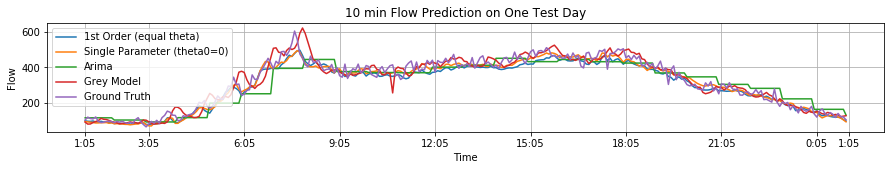

In [71]:
fig5, ax5 = plt.subplots(1,1)
ax5.plot(flow_single_predict10[:288],label='1st Order (equal theta)')
ax5.plot(flow_renormalization_predict10[:288],label='Single Parameter (theta0=0)')
ax5.plot(arima_flow[13:-1][:288],label='Arima')
ax5.plot(grey_flow10[13:-1][:288],label='Grey Model')
ax5.plot(real_flow[13:-1][:288],label='Ground Truth')
ax5.legend()
ax5.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax5.set_xticklabels(['1:05','3:05','6:05','9:05','12:05','15:05','18:05','21:05','0:05','1:05'])
ax5.set_title('10 min Flow Prediction on One Test Day')
ax5.set_xlabel('Time')
ax5.set_ylabel('Flow')
ax5.grid()

In [72]:
print('MAE Single Parameter: ',MAE(flow_single_predict10[:288],real_flow[13:-1][:288]))
print('MAE Zero Theta Zero: ',MAE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
print('MAE Arima: ',MAE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
print('MAE Grey Model: ',MAE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))

print('RMSE Single Parameter: ',RMSE(flow_single_predict10[:288],real_flow[13:-1][:288]))
print('RMSE Zero Theta Zero: ',RMSE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
print('RMSE Arima: ',RMSE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
print('RMSE Grey Model: ',RMSE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))

print('MAPE Single Parameter: ',MAPE(flow_single_predict10[:288],real_flow[13:-1][:288]))
print('MAPE Zero Theta Zero: ',MAPE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
print('MAPE Arima: ',MAPE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
print('MAPE Grey Model: ',MAPE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))

MAE Single Parameter:  26.613099601533676
MAE Zero Theta Zero:  23.073161549038357
MAE Arima:  38.79745029854824
MAE Grey Model:  30.189463726006963
RMSE Single Parameter:  34.66062138747477
RMSE Zero Theta Zero:  29.127133150336697
RMSE Arima:  51.33611173997004
RMSE Grey Model:  41.4659297540436
MAPE Single Parameter:  0.09603826088160401
MAPE Zero Theta Zero:  0.08977184688456395
MAPE Arima:  0.14871383896914184
MAPE Grey Model:  0.10898579090359468


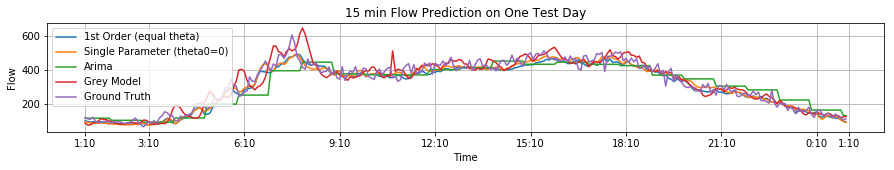

In [73]:
fig6, ax6 = plt.subplots(1,1)
ax6.plot(flow_single_predict15[:288],label='1st Order (equal theta)')
ax6.plot(flow_renormalization_predict15[:288],label='Single Parameter (theta0=0)')
ax6.plot(arima_flow[14:][:288],label='Arima')
ax6.plot(grey_flow15[14:][:288],label='Grey Model')
ax6.plot(real_flow[14:][:288],label='Ground Truth')
ax6.legend()
ax6.set_xticks([0,24,60,96,132,168,204,240,276,288])
ax6.set_xticklabels(['1:10','3:10','6:10','9:10','12:10','15:10','18:10','21:10','0:10','1:10'])
ax6.set_title('15 min Flow Prediction on One Test Day')
ax6.set_xlabel('Time')
ax6.set_ylabel('Flow')
ax6.grid()

In [74]:
print('MAE Single Parameter: ',MAE(flow_single_predict15[:288],real_flow[14:][:288]))
print('MAE Zero Theta Zero: ',MAE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
print('MAE Arima: ',MAE(arima_flow[14:][:288],real_flow[14:][:288]))
print('MAE Grey Model: ',MAE(grey_flow15[14:][:288],real_flow[14:][:288]))

print('RMSE Single Parameter: ',RMSE(flow_single_predict15[:288],real_flow[14:][:288]))
print('RMSE Zero Theta Zero: ',RMSE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
print('RMSE Arima: ',RMSE(arima_flow[14:][:288],real_flow[14:][:288]))
print('RMSE Grey Model: ',RMSE(grey_flow15[14:][:288],real_flow[14:][:288]))

print('MAPE Single Parameter: ',MAPE(flow_single_predict15[:288],real_flow[14:][:288]))
print('MAPE Zero Theta Zero: ',MAPE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
print('MAPE Arima: ',MAPE(arima_flow[14:][:288],real_flow[14:][:288]))
print('MAPE Grey Model: ',MAPE(grey_flow15[14:][:288],real_flow[14:][:288]))

MAE Single Parameter:  25.93594461017185
MAE Zero Theta Zero:  23.352452516555786
MAE Arima:  38.82007527403797
MAE Grey Model:  34.04557053281251
RMSE Single Parameter:  33.26095448315743
RMSE Zero Theta Zero:  29.363868850907373
RMSE Arima:  51.342915895294325
RMSE Grey Model:  47.23977567860122
MAPE Single Parameter:  0.09660470382130343
MAPE Zero Theta Zero:  0.09066878005205431
MAPE Arima:  0.14884335263011034
MAPE Grey Model:  0.12087026536958234


In [75]:
PerformanceComparison = []
PerformanceComparison.append(MAE(speed_single_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAE(arima[12:-2][:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))
PerformanceComparison.append(RMSE(speed_single_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(RMSE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(RMSE(arima[12:-2][:288],real_speed[12:-2][:288]))
PerformanceComparison.append(RMSE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAPE(speed_single_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAPE(speed_renormalization_predict5[:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAPE(arima[12:-2][:288],real_speed[12:-2][:288]))
PerformanceComparison.append(MAPE(grey_speed5[12:-2][:288],real_speed[12:-2][:288]))

PerformanceComparison.append(MAE(speed_single_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAE(arima[13:-1][:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))
PerformanceComparison.append(RMSE(speed_single_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(RMSE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(RMSE(arima[13:-1][:288],real_speed[13:-1][:288]))
PerformanceComparison.append(RMSE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAPE(speed_single_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAPE(speed_renormalization_predict10[:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAPE(arima[13:-1][:288],real_speed[13:-1][:288]))
PerformanceComparison.append(MAPE(grey_speed10[13:-1][:288],real_speed[13:-1][:288]))

PerformanceComparison.append(MAE(speed_single_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(MAE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(MAE(arima[14:][:288],real_speed[14:][:288]))
PerformanceComparison.append(MAE(grey_speed15[14:][:288],real_speed[14:][:288]))
PerformanceComparison.append(RMSE(speed_single_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(RMSE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(RMSE(arima[14:][:288],real_speed[14:][:288]))
PerformanceComparison.append(RMSE(grey_speed15[14:][:288],real_speed[14:][:288]))
PerformanceComparison.append(MAPE(speed_single_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(MAPE(speed_renormalization_predict15[:288],real_speed[14:][:288]))
PerformanceComparison.append(MAPE(arima[14:][:288],real_speed[14:][:288]))
PerformanceComparison.append(MAPE(grey_speed15[14:][:288],real_speed[14:][:288]))

PerformanceComparison.append(MAE(flow_single_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))
PerformanceComparison.append(RMSE(flow_single_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(RMSE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(RMSE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
PerformanceComparison.append(RMSE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAPE(flow_single_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAPE(flow_renormalization_predict5[:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAPE(arima_flow[12:-2][:288],real_flow[12:-2][:288]))
PerformanceComparison.append(MAPE(grey_flow5[12:-2][:288],real_flow[12:-2][:288]))

PerformanceComparison.append(MAE(flow_single_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))
PerformanceComparison.append(RMSE(flow_single_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(RMSE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(RMSE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
PerformanceComparison.append(RMSE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAPE(flow_single_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAPE(flow_renormalization_predict10[:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAPE(arima_flow[13:-1][:288],real_flow[13:-1][:288]))
PerformanceComparison.append(MAPE(grey_flow10[13:-1][:288],real_flow[13:-1][:288]))

PerformanceComparison.append(MAE(flow_single_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(MAE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(MAE(arima_flow[14:][:288],real_flow[14:][:288]))
PerformanceComparison.append(MAE(grey_flow15[14:][:288],real_flow[14:][:288]))
PerformanceComparison.append(RMSE(flow_single_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(RMSE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(RMSE(arima_flow[14:][:288],real_flow[14:][:288]))
PerformanceComparison.append(RMSE(grey_flow15[14:][:288],real_flow[14:][:288]))
PerformanceComparison.append(MAPE(flow_single_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(MAPE(flow_renormalization_predict15[:288],real_flow[14:][:288]))
PerformanceComparison.append(MAPE(arima_flow[14:][:288],real_flow[14:][:288]))
PerformanceComparison.append(MAPE(grey_flow15[14:][:288],real_flow[14:][:288]))

In [76]:
PerformanceComparison = np.array(PerformanceComparison).reshape((18,4)).T

In [77]:
pc = pd.DataFrame(PerformanceComparison,columns=['5 min MAE','5 min RMSE','5 min MAPE','10 min MAE','10 min RMSE','10 min MAPE','15 min MAE','15 min RMSE','15 min MAPE','5 min MAE','5 min RMSE','5 min MAPE','10 min MAE','10 min RMSE','10 min MAPE','15 min MAE','15 min RMSE','15 min MAPE'])
pc['model']=['Single Parameter','Renormalization Trick','Arima','Grey Model']
pc = pc.set_index('model')

In [78]:
fig1.savefig('5min_speed')
fig2.savefig('10min_speed')
fig3.savefig('15min_speed')
fig4.savefig('5min_flow')
fig5.savefig('10min_flow')
fig6.savefig('15min_flow')
pc.to_csv('PerformanceComparison.csv')

In [79]:
singleSpeedTrainLoss = np.array(pd.read_csv('single_speed/training_losses.csv'))
singleSpeedValLoss = np.array(pd.read_csv('single_speed/validation_losses.csv'))
singleFlowTrainLoss = np.array(pd.read_csv('single_flow/training_losses.csv'))
singleFlowValLoss = np.array(pd.read_csv('single_flow/validation_losses.csv'))

RenormalSpeedTrainLoss = np.array(pd.read_csv('renormalization_speed/training_losses.csv'))
RenormalSpeedValLoss = np.array(pd.read_csv('renormalization_speed/validation_losses.csv'))
RenormalFlowTrainLoss = np.array(pd.read_csv('renormalization_flow/training_losses.csv'))
RenormalFlowValLoss = np.array(pd.read_csv('renormalization_flow/validation_losses.csv'))

In [80]:
plt.rcParams['figure.figsize'] = (4.0, 6.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 72

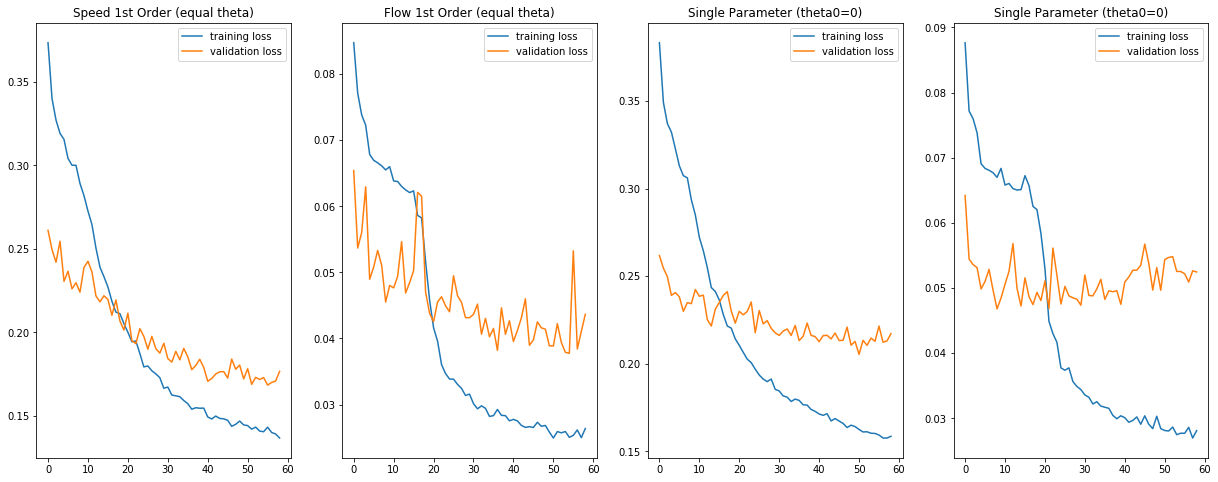

In [81]:
fig7, [ax7, ax8, ax9, ax10] = plt.subplots(1,4,figsize=(21, 8))
#fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharey=True, figsize=(6, 6))
ax7.plot(singleSpeedTrainLoss,label="training loss")
ax7.plot(singleSpeedValLoss,label="validation loss")
ax7.set_title('Speed 1st Order (equal theta)')
ax7.legend()
ax8.plot(singleFlowTrainLoss,label="training loss")
ax8.plot(singleFlowValLoss,label="validation loss")
ax8.set_title('Flow 1st Order (equal theta)')
ax8.legend()
ax9.plot(RenormalSpeedTrainLoss,label="training loss")
ax9.plot(RenormalSpeedValLoss,label="validation loss")
ax9.set_title('Single Parameter (theta0=0)')
ax9.legend()
ax10.plot(RenormalFlowTrainLoss,label="training loss")
ax10.plot(RenormalFlowValLoss,label="validation loss")
ax10.set_title('Single Parameter (theta0=0)')
ax10.legend()

In [82]:
fig7.savefig('PerformanceComparison')